# Lab Work 4 (student version): standard graph models

## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472

We can use the following libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import random
import time

from collections import deque # Used as queue
print(sys.version)

3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


This lab work will spread over sessions 5 and 6. 

## Exercise 1: Preliminary work

### Question 1

Download the graph as_caida.txt (CAIDA) on Moodle and load it in memory as a dictionary of lists (as usual). This graph is a partial map of the Internet at the AS level as obtained using BGP tables during the CAIDA project in 2007. 

Download also the graph ip_inet.txt (INET) on Moodle and load it in memory as a dictionary of lists. This graph is a partial map of the Internet at the IP level. 

Both will be used during the rest of this practical work. 

Apply the codes seen in the previous labs to:
- count its number of nodes and links, 
- plot its degree distribution,
- compute its number of triangles,
- give an approximation of its diameter.


In [2]:
# Code taken from our TP1

def load_graph(filename):
    # Initialize an empty dictionary for the adjacency list.
    adjacency_list = {}
    
    # Open the specified file for reading.
    with open(filename, 'r') as file:
        # Loop through each line in the file.
        for line in file:
            # Check if the line does not start with '#' (comments)
            if not line.startswith('#'):
                # Split the line into two nodes representing an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]
                # Check if node1 is not already in the adjacency list.
                if node1 not in adjacency_list:
                    # Initialize an empty list for node1 in the adjacency list.
                    adjacency_list[node1] = []
                # Check if node2 is not already in the adjacency list.
                if node2 not in adjacency_list:
                    # Initialize an empty list for node2 in the adjacency list.
                    adjacency_list[node2] = []
                # Add node2 to the adjacency list of node1 (representing an undirected edge).
                adjacency_list[node1].append(node2)
                # Add node1 to the adjacency list of node2 (since it's an undirected edge).
                adjacency_list[node2].append(node1)

    # Return the adjacency list representing the undirected graph.
    return adjacency_list

In [3]:
# Code taken from our TP1

def count_nodes_edges(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize a variable to count the number of edges
    edges = 0

    # Open the specified file in read ('read only') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace and split the line into parts
            edge_info = line.strip().split()
            # Check if the line does not contain exactly two values (node identifiers)
            if len(edge_info) != 2:
                # Skip lines that don't have two values, they might be comments or errors
                continue
            # Add both node identifiers to the 'nodes' set
            nodes.update(edge_info)
            # Increment the edge count
            edges += 1

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # final count for edges
    num_edges = edges

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [4]:
# Code taken from our TP1

def test_count_nodes_edges(filename):
    start_time = time.time()
    num_nodes, num_edges = count_nodes_edges(filename)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

In [5]:
# Code taken from our TP1

def compute_degree_distribution(adjacency_list):
    # Initialize an empty dictionary to store the degree distribution.
    degree_distribution = {}
    
    # Iterate through each node in the adjacency list along with its neighbors.
    for node, neighbors in adjacency_list.items():
        # Calculate the degree of the current node by finding the number of its neighbors.
        degree = len(neighbors)
        # Check if the degree already exists as a key in the degree_distribution dictionary.
        if degree in degree_distribution:
            # If it exists, increment the count for that degree by 1.
            degree_distribution[degree] += 1
        else:
            # If it doesn't exist, add it to the degree_distribution dictionary with a count of 1.
            degree_distribution[degree] = 1
    
    # Return the degree_distribution dictionary, which represents the degree distribution of nodes
    # in the input graph, where keys are degrees, and values are the number of nodes with that degree.
    return degree_distribution

In [6]:
def plot_degree_distribution(adjacency_list):
    degree_distribution = compute_degree_distribution(adjacency_list)

    # Extract degrees and counts for plotting.
    degrees = list(degree_distribution.keys())
    counts = list(degree_distribution.values())
    
    # Set the y-axis to a logarithmic scale for better visualization.
    plt.yscale('log')
    # Set the x-axis to a logarithmic scale for better visualization.
    plt.xscale('log')

    # Plot the degree distribution with adjusted axis limits.
    plt.scatter(degrees, counts, color='skyblue')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution of the Graph')

    plt.show()

In [7]:
# Code taken from our TP2

def improved_triangle_counting(graph):
    # Initialize a counter for the number of triangles
    nb = 0

    # Iterate over all edges (u, v) where u < v
    for u in set(graph):
        for v in set(graph[u]):
            # Ensure u is less than v to avoid duplicate counts
            if u < v:
                # Find common neighbors of u and v
                common_neighbors = set(graph[u]) & set(graph[v])
                # Iterate over common neighbors (w) where v < w
                for w in common_neighbors:
                    if v < w:
                        # Increment the triangle counter
                        nb += 1

    # Return the total count of triangles
    return nb

In [8]:
# Code taken from our TP2

def test_improved_triangle_count(graph):
    start_time = time.time()
    result = improved_triangle_counting(graph)
    print("Number of triangles:", result)
    print(f"Calculating triangle done in {time.time() - start_time:.5f} seconds")

In [9]:
# Code taken from our TP2

def compute_distances(graph, start_node):
    # Check if the starting node exists in the graph
    if start_node not in graph: # In case someone decides to be funny and use a non-existing node
        print(f"<!>Error<!>: The starting node '{start_node}' not found in the graph.")
        print(f"<!>Error<!>: Are you sure you didn't make a typo?")
        return
    
    # Initialize a dictionary to store distances from the start node to other nodes
    distances = {}
    # Initialize a deque (double-ended queue) and add the starting node
    queue = deque()
    queue.append(start_node)
    # Set the distance from the start node to itself to be 0
    distances[start_node] = 0

    # Main BFS loop to compute distances
    while queue:
        # Get the current node from the front of the queue
        current_node = queue.popleft()
        # Iterate through neighbors of the current node
        for neighbor in graph[current_node]:
            # Check if the neighbor has not been assigned a distance
            if neighbor not in distances:
                # Add the neighbor to the queue
                queue.append(neighbor)
                # Set the distance from the start node to the neighbor
                distances[neighbor] = distances[current_node] + 1

    # Return the computed distances
    return distances

In [10]:
# Code taken from our TP2

def lower_bound_diameter(graph, sample_size=None):
    # Initialize the lower bound to 0
    lower_bound = 0

    # If sample_size is None, use all nodes for BFS, otherwise, use a sample
    nodes_to_sample = list(graph.keys())

    # If a sample size is specified and greater than 0
    if sample_size is not None and sample_size > 0:
        # Ensure that the sample size is not greater than the population size
        sample_size = min(sample_size, len(nodes_to_sample))
        # Randomly sample nodes for BFS
        nodes_to_sample = random.sample(nodes_to_sample, sample_size)

    # Compute distances for sampled nodes in a single BFS traversal
    all_distances = {}
    for start_node in nodes_to_sample:
        # Use a BFS to compute distances from the start node to all other nodes
        distances = compute_distances(graph, start_node)
        all_distances[start_node] = distances

    # Iterate over each node to determine eccentricity
    for start_node, distances in all_distances.items():
        # Find the maximum distance, representing the eccentricity of the node
        eccentricity = max(distances.values())
        # Update the lower bound if the eccentricity is greater
        lower_bound = max(lower_bound, eccentricity)

    # Return the computed lower bound for the diameter
    return lower_bound

In [11]:
# Code taken from our TP2

def test_lower_bound_diameter(graph, sample_size=None):
    start_time = time.time()
    lower_bound = lower_bound_diameter(graph, sample_size=sample_size)
    print(f"Lower bound for diameter: {lower_bound}")
    print(f"Calculating lower bound done in {time.time() - start_time:.5f} seconds")

In [12]:
filename = 'as_caida.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 26475
Number of edges: 53381
Nodes and edges counted in 0.03303 seconds


In [13]:
filename = 'as_caida.txt'
start_time = time.time()
caida_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.04805 seconds


In [14]:
degree_distribution = compute_degree_distribution(caida_graph)
print(degree_distribution)

{3: 2509, 227: 1, 2: 10465, 913: 1, 518: 1, 1631: 1, 2628: 1, 999: 1, 271: 1, 176: 1, 47: 6, 239: 1, 14: 62, 42: 8, 9: 129, 59: 2, 1: 9937, 50: 3, 7: 237, 30: 11, 4: 1028, 6: 341, 36: 7, 11: 98, 5: 535, 49: 6, 34: 7, 13: 60, 8: 171, 16: 40, 19: 35, 12: 75, 564: 2, 26: 14, 405: 1, 497: 1, 1699: 1, 2052: 1, 113: 1, 290: 1, 292: 1, 89: 2, 615: 1, 498: 1, 1677: 1, 220: 1, 308: 1, 319: 1, 177: 1, 311: 1, 695: 1, 20: 32, 61: 3, 124: 1, 40: 7, 222: 1, 169: 2, 72: 2, 233: 2, 95: 1, 135: 1, 540: 1, 10: 128, 156: 2, 143: 1, 327: 2, 417: 1, 142: 1, 487: 1, 52: 7, 159: 1, 38: 8, 45: 9, 31: 10, 96: 2, 17: 44, 35: 11, 102: 1, 128: 1, 23: 21, 71: 6, 99: 2, 24: 19, 21: 21, 15: 41, 27: 11, 469: 1, 129: 1, 198: 2, 426: 1, 437: 1, 111: 2, 37: 6, 68: 2, 88: 2, 182: 1, 109: 2, 51: 6, 56: 5, 104: 2, 67: 4, 127: 1, 190: 1, 53: 3, 282: 1, 22: 24, 32: 9, 33: 4, 25: 13, 28: 14, 94: 1, 65: 2, 44: 3, 82: 2, 78: 1, 18: 36, 43: 8, 83: 5, 29: 13, 58: 2, 91: 2, 184: 1, 1272: 1, 63: 4, 114: 1, 41: 8, 60: 2, 77: 2, 66:

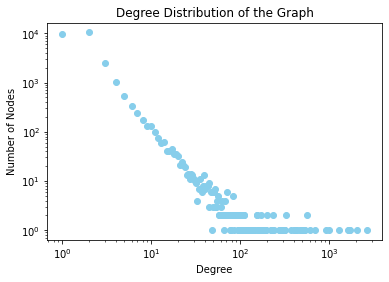

In [15]:
plot_degree_distribution(caida_graph)

In [16]:
graph = caida_graph
result = test_improved_triangle_count(graph)

Number of triangles: 36365
Calculating triangle done in 1.20193 seconds


In [17]:
graph = caida_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 17
Calculating lower bound done in 25.33864 seconds


In [18]:
filename = 'ip_inet.txt'
result = test_count_nodes_edges(filename)

Number of nodes: 9740
Number of edges: 35567
Nodes and edges counted in 0.02348 seconds


In [19]:
filename = 'ip_inet.txt'
start_time = time.time()
inet_graph = load_graph(filename)
print(f"Graph loaded in {time.time() - start_time:.5f} seconds")

Graph loaded in 0.04583 seconds


In [20]:
degree_distribution = compute_degree_distribution(inet_graph)
print(degree_distribution)

{4: 740, 7: 326, 20: 40, 1: 1963, 3: 1121, 5: 466, 2: 2093, 11: 167, 6: 412, 9: 217, 8: 273, 27: 37, 17: 98, 16: 88, 14: 111, 10: 191, 12: 141, 13: 158, 15: 126, 19: 51, 22: 53, 40: 6, 39: 10, 23: 17, 26: 25, 24: 8, 32: 31, 18: 106, 28: 40, 31: 68, 30: 8, 58: 5, 57: 53, 21: 31, 35: 34, 25: 30, 36: 8, 41: 68, 37: 33, 33: 60, 29: 63, 44: 8, 43: 16, 45: 39, 52: 2, 51: 2, 54: 1, 38: 10, 47: 21, 50: 35, 42: 6, 34: 23, 53: 1}


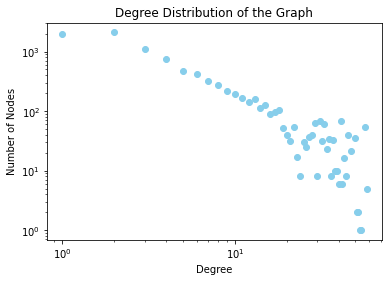

In [21]:
plot_degree_distribution(inet_graph)

In [22]:
graph = inet_graph
result = test_improved_triangle_count(graph)

Number of triangles: 206909
Calculating triangle done in 0.17213 seconds


In [23]:
graph = inet_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 33
Calculating lower bound done in 7.72995 seconds


## Exercise 2: Erdös-Rényi model

### Question 2

Create an Erdös-Rényi graph with the same number of nodes and links as the CAIDA graph. Same for the INET graph.

In [24]:
def erdos_renyi_graph(node_count, link_count):
    """
    Generate an Erdos-Renyi random graph with a specified number of nodes and links.

    Parameters:
    - node_count: Number of nodes in the graph
    - link_count: Number of links to randomly connect nodes

    Returns:
    - graph: Dictionary representing the generated graph (adjacency list)
    """
    # Initialize an empty graph with nodes
    graph = {node_index: [] for node_index in range(node_count)}
    # Randomly connect nodes until the desired link count is reached
    while link_count > 0:
        node1, node2 = random.randint(0, node_count - 1), random.randint(0, node_count - 1)
        # Ensure nodes are distinct and not already connected
        if node1 != node2 and node1 not in graph[node2]:
            # Add edges in both directions
            graph[node1].append(node2)
            graph[node2].append(node1)
            link_count -= 1
    
    return graph

In [25]:
def erdos_renyi(node_count, link_count, filename):
    # Initialize an empty graph with nodes
    graph = {node_index: [] for node_index in range(node_count)}
    # Randomly connect nodes until the desired link count is reached
    while link_count > 0:
        node1, node2 = random.randint(0, node_count - 1), random.randint(0, node_count - 1)
        
        # Ensure nodes are distinct and not already connected
        if node1 != node2 and node1 not in graph[node2]:
            # Add edges in both directions
            graph[node1].append(node2)
            graph[node2].append(node1)
            link_count -= 1
    
    # Save the graph to a text file
    with open(filename, 'w') as file:
        for node, neighbors in graph.items():
            file.write(f"{node}: {', '.join(map(str, neighbors))}\n")

### Sidenote:

We updated our count_nodes_edges() function to suits our need in this lab

In [26]:
def count_nodes_edges_v2(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize a set to store unique edges
    unique_edges = set()

    # Open the specified file in read ('read only') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace and split the line into parts
            parts = line.strip().split(':')
            
            # Check if the line does not contain exactly two values (node and its adjacents)
            if len(parts) != 2:
                # Skip lines that don't have two values, they might be comments or errors
                continue

            # Extract the node and its adjacent nodes
            node = int(parts[0])
            adjacents = [int(adj) for adj in parts[1].split(',') if adj.strip()]

            # Add the node to the 'nodes' set
            nodes.add(node)

            # Iterate through adjacent nodes and add unique edges to the 'unique_edges' set
            for adjacent in adjacents:
                edge = (min(node, adjacent), max(node, adjacent))
                unique_edges.add(edge)

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # Calculate the number of unique edges by finding the length of the 'unique_edges' set
    num_edges = len(unique_edges)

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [27]:
def test_count_nodes_edges_v2(filename):
    start_time = time.time()
    num_nodes, num_edges = count_nodes_edges_v2(filename)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Nodes and edges counted in {time.time() - start_time:.5f} seconds")

In [28]:
node_count = 26475
link_count = 53381
filename = 'erdos_renyi_caida_graph.txt'
erdos_renyi(node_count, link_count, filename)

In [29]:
filename = 'erdos_renyi_caida_graph.txt'
result = test_count_nodes_edges_v2(filename)

Number of nodes: 26475
Number of edges: 53381
Nodes and edges counted in 0.11799 seconds


In [30]:
node_count = 9740
link_count = 35567
filename = 'erdos_renyi_inet_graph.txt'
erdos_renyi(node_count, link_count, filename)

In [31]:
filename = 'erdos_renyi_inet_graph.txt'
result = test_count_nodes_edges_v2(filename)

Number of nodes: 9740
Number of edges: 35567
Nodes and edges counted in 0.06939 seconds


### Question 3

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

In [32]:
node_count = 26475
link_count = 53381
er_caida_graph = erdos_renyi_graph(node_count,link_count)

In [33]:
degree_distribution = compute_degree_distribution(er_caida_graph)
print(degree_distribution)

{4: 5218, 3: 5106, 5: 4074, 1: 1887, 7: 1590, 8: 820, 10: 146, 6: 2898, 2: 3820, 9: 370, 0: 474, 11: 59, 12: 11, 13: 2}


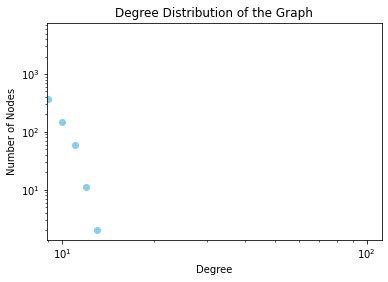

In [34]:
plot_degree_distribution(er_caida_graph)

In [35]:
graph = er_caida_graph
result = test_improved_triangle_count(graph)

Number of triangles: 12
Calculating triangle done in 0.10930 seconds


In [36]:
graph = er_caida_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 15
Calculating lower bound done in 32.01322 seconds


In [37]:
node_count = 9740
link_count = 35567
er_inet_graph = erdos_renyi_graph(node_count,link_count)

In [38]:
degree_distribution = compute_degree_distribution(er_inet_graph)
print(degree_distribution)

{6: 1437, 8: 1313, 11: 515, 7: 1469, 10: 809, 3: 429, 4: 771, 9: 1055, 5: 1083, 12: 314, 1: 48, 15: 46, 2: 160, 13: 180, 14: 77, 16: 17, 17: 8, 0: 7, 18: 1, 19: 1}


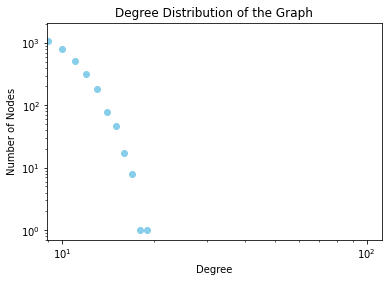

In [39]:
plot_degree_distribution(er_inet_graph)

In [40]:
graph = er_inet_graph
result = test_improved_triangle_count(graph)

Number of triangles: 60
Calculating triangle done in 0.07161 seconds


In [41]:
graph = er_inet_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 8
Calculating lower bound done in 13.23558 seconds


### Answer:

Sadly, even though the Erdös-Rényi model can replicate the exact number of nodes and links, it's not able to do the same for the number of triangles present in the generated graph, as we can see from the comparison just above.

## Exercise 3: Barabasi-Albert model


### Question 4

Create a Barabasi-Albert graph with a number of links and nodes comparable to the CAIDA graph. We remind that in a BA model with $n$ nodes, the number of links $m$ is (approximately) equal to $\alpha n$ where $ \alpha $ is the parameter of the model. 

Same question for the INET graph.

In [42]:
def barabasi_albert_graph(n, m):
    """
    Generate a Barabasi-Albert graph using preferential attachment.

    Parameters:
    - n: Number of nodes in the graph
    - m: Number of edges to attach from a new node to existing nodes

    Returns:
    - graph: Dictionary representing the generated graph (adjacency list)
    """
    # Initialize the graph with a fully connected initial small graph (m nodes)
    graph = {i: set(range(i)) - {i} for i in range(m)}
    
    # Calculate the initial total nodes for preferential attachment
    total_nodes = m * (m - 1) // 2  

    # Generate the Barabasi-Albert graph
    for new_node in range(m, n):
        # Calculate probabilities for attaching edges to existing nodes
        probabilities = [len(neighbors) for neighbors in graph.values()]
        total_nodes += m

        # Attach m edges to existing nodes based on probabilities
        selected_nodes = random.choices(list(graph), weights=probabilities, k=m)
        graph[new_node] = set(selected_nodes)
        
        # Update neighbors of existing nodes
        for selected_node in selected_nodes:
            graph[selected_node].add(new_node)

    return graph

In [43]:
def barabasi_albert(n, m, filename):
    # Initialize the graph with a fully connected initial small graph (m nodes)
    graph = {i: set(range(i)) - {i} for i in range(m)}
    
    # Calculate the initial total nodes for preferential attachment
    total_nodes = m * (m - 1) // 2  

    # Generate the Barabasi-Albert graph
    for new_node in range(m, n):
        # Calculate probabilities for attaching edges to existing nodes
        probabilities = [len(neighbors) for neighbors in graph.values()]
        total_nodes += m

        # Attach m edges to existing nodes based on probabilities
        selected_nodes = random.choices(list(graph), weights=probabilities, k=m)
        graph[new_node] = set(selected_nodes)
        
        # Update neighbors of existing nodes
        for selected_node in selected_nodes:
            graph[selected_node].add(new_node)

    # Save the graph to a text file
    with open(filename, 'w') as file:
        for node, neighbors in graph.items():
            file.write(f"{node}: {', '.join(map(str, neighbors))}\n")

In [44]:
node_count = 26475
m = 2
filename = 'barabasi_albert_caida_graph.txt'
barabasi_albert(node_count, m, filename)

In [45]:
filename = 'barabasi_albert_caida_graph.txt'
result = test_count_nodes_edges_v2(filename)

Number of nodes: 26475
Number of edges: 52924
Nodes and edges counted in 0.16815 seconds


In [46]:
node_count = 9740
m = 4
filename = 'barabasi_albert_inet_graph.txt'
barabasi_albert(node_count, m, filename)

In [47]:
filename = 'barabasi_albert_inet_graph.txt'
result = test_count_nodes_edges_v2(filename)

Number of nodes: 9740
Number of edges: 38870
Nodes and edges counted in 0.07977 seconds


### Question 5

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

In [48]:
node_count = 26475
m = 2
ba_caida_graph = barabasi_albert_graph(node_count,m)

In [49]:
degree_distribution = compute_degree_distribution(ba_caida_graph)
print(degree_distribution)

{0: 1, 563: 1, 289: 1, 63: 2, 312: 1, 120: 1, 229: 1, 84: 2, 8: 427, 75: 1, 97: 1, 136: 2, 57: 2, 280: 1, 23: 26, 61: 3, 144: 1, 28: 12, 15: 87, 54: 1, 116: 1, 91: 2, 83: 1, 85: 2, 20: 30, 89: 2, 32: 10, 38: 3, 12: 149, 141: 1, 78: 2, 137: 1, 7: 623, 51: 3, 17: 60, 104: 1, 55: 3, 47: 2, 39: 9, 50: 2, 22: 30, 73: 2, 27: 15, 24: 20, 43: 3, 58: 2, 65: 1, 113: 1, 19: 34, 64: 1, 5: 1486, 69: 1, 37: 9, 29: 13, 56: 2, 25: 11, 14: 110, 82: 2, 33: 7, 6: 908, 18: 71, 30: 12, 45: 5, 36: 3, 41: 4, 95: 2, 3: 5419, 34: 9, 62: 1, 48: 3, 13: 114, 10: 241, 114: 1, 59: 1, 98: 1, 44: 2, 16: 65, 42: 3, 11: 161, 1: 10, 4: 2574, 2: 13236, 21: 18, 40: 6, 9: 337, 96: 1, 72: 1, 74: 1, 26: 18, 49: 2, 35: 3, 68: 1, 31: 8, 46: 2}


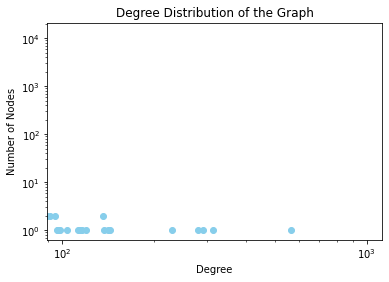

In [50]:
plot_degree_distribution(ba_caida_graph)

In [51]:
graph = ba_caida_graph
result = test_improved_triangle_count(graph)

Number of triangles: 196
Calculating triangle done in 0.10045 seconds


In [52]:
graph = ba_caida_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 9
Calculating lower bound done in 33.47639 seconds


In [53]:
node_count = 9740
m = 4
ba_inet_graph = barabasi_albert_graph(node_count,m)

In [54]:
degree_distribution = compute_degree_distribution(ba_inet_graph)
print(degree_distribution)

{0: 1, 82: 1, 155: 1, 234: 1, 236: 1, 291: 1, 184: 1, 266: 1, 98: 1, 73: 2, 20: 45, 253: 1, 106: 1, 115: 1, 198: 1, 25: 21, 219: 1, 79: 3, 211: 1, 185: 1, 146: 1, 59: 1, 138: 1, 29: 20, 32: 11, 112: 1, 118: 1, 40: 6, 124: 1, 70: 2, 68: 1, 51: 5, 45: 3, 44: 3, 52: 5, 30: 13, 135: 1, 100: 1, 48: 2, 69: 2, 67: 1, 83: 1, 121: 1, 18: 53, 28: 19, 17: 68, 95: 2, 54: 1, 31: 20, 49: 3, 61: 3, 87: 2, 97: 1, 64: 1, 21: 40, 223: 1, 24: 27, 38: 9, 39: 9, 46: 6, 34: 12, 35: 15, 23: 30, 36: 5, 58: 1, 76: 2, 33: 12, 19: 51, 55: 3, 16: 94, 71: 1, 96: 1, 53: 1, 41: 3, 10: 326, 14: 126, 50: 1, 26: 12, 22: 31, 12: 165, 42: 3, 27: 12, 65: 1, 57: 1, 43: 2, 9: 365, 15: 82, 13: 143, 11: 230, 66: 1, 77: 1, 37: 1, 5: 1837, 47: 1, 8: 581, 72: 1, 7: 755, 62: 1, 6: 1094, 4: 3290, 3: 10}


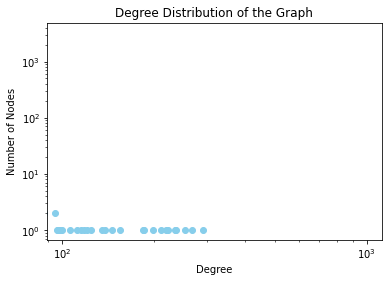

In [55]:
plot_degree_distribution(ba_inet_graph)

In [56]:
graph = ba_inet_graph
result = test_improved_triangle_count(graph)

Number of triangles: 1065
Calculating triangle done in 0.07096 seconds


In [57]:
graph = ba_inet_graph
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 6
Calculating lower bound done in 11.97624 seconds


Answer

## Exercise 4: Watts-Strogatz model

### Question 6

Create a regular graph with a number of nodes $n$ equals to the one of the initial CAIDA graph. We have these constraints:

* all nodes of a regular graph have the same degree $k$, choose $k$ so that the number $m$ of edges is close to the one of the CAIDA graph,

* each node is connected to the nodes with the closest index, for example, if $k=6$, node $i$ will be connected to nodes $ i-1 $, $ i-2 $, $ i-3$ and $ i+1 $, $ i+2 $, $ i+3 $.

Same question for the INET graph.

In [58]:
def create_regular_graph(n, k):
    """
    Create a regular graph with a specified number of nodes and degree.

    Parameters:
    - n: Number of nodes in the graph
    - k: Degree of each node (even number for regularity)

    Returns:
    - graph: Dictionary representing the generated regular graph (adjacency list)
    """
    # Initialize an empty graph with nodes
    graph = {i: set() for i in range(n)}

    # Connect each node to the nodes with the closest indices
    for node in range(n):
        for offset in range(1, (k // 2) + 1):
            # Calculate indices of neighbors on both sides
            neighbor_left = (node - offset) % n
            neighbor_right = (node + offset) % n

            # Connect the node to its neighbors
            graph[node].add(neighbor_left)
            graph[node].add(neighbor_right)

            # Add reciprocal connections to neighbors
            graph[neighbor_left].add(node)
            graph[neighbor_right].add(node)

    return graph

In [59]:
def create_regular(n, k, filename):
    # Initialize an empty graph with nodes
    graph = {i: set() for i in range(n)}

    # Connect each node to the nodes with the closest indices
    for node in range(n):
        for offset in range(1, (k // 2) + 1):
            # Calculate indices of neighbors on both sides
            neighbor_left = (node - offset) % n
            neighbor_right = (node + offset) % n

            # Connect the node to its neighbors
            graph[node].add(neighbor_left)
            graph[node].add(neighbor_right)

            # Add reciprocal connections to neighbors
            graph[neighbor_left].add(node)
            graph[neighbor_right].add(node)

    # Save the graph to a text file
    with open(filename, 'w') as file:
        for node, neighbors in graph.items():
            neighbors_str = ', '.join(map(str, neighbors))
            file.write(f"{node}: {neighbors_str}\n")

In [60]:
node_count = 26475
k = 4
filename = 'regular_graph_caida_graph.txt'
create_regular(node_count, k, filename)

In [61]:
filename = 'regular_graph_caida_graph.txt'
result = test_count_nodes_edges_v2(filename)

Number of nodes: 26475
Number of edges: 52950
Nodes and edges counted in 0.10745 seconds


In [62]:
node_count = 9740
k = 8
filename = 'regular_graph_inet_graph.txt'
create_regular(node_count, k, filename)

In [63]:
filename = 'regular_graph_inet_graph.txt'
result = test_count_nodes_edges_v2(filename)

Number of nodes: 9740
Number of edges: 38960
Nodes and edges counted in 0.06076 seconds


### Question 7

Starting from the graph created in the previous question, generate Watts-Strogatz models with several values of the parameter $p$: 0.01, 0.1, 0.3.

In [64]:
def ws_generation(graph, p):
    """
    Generate a Watts-Strogatz model by rewiring edges in a given graph.

    Parameters:
    - graph: Dictionary representing the input graph (adjacency list)
    - p: Rewiring probability, a value between 0 and 1

    Returns:
    - new_graph: Dictionary representing the generated Watts-Strogatz model (adjacency list)
    """
    # Create a new graph with the same initial structure
    new_graph = {node: set(neighbors) for node, neighbors in graph.items()}

    # Iterate through each node and its neighbors in the original graph
    for node in graph:
        for neighbor in graph[node]:
            # Rewire edges with probability p
            if random.random() < p:
                # Choose a new neighbor not already connected to the node
                new_neighbor = random.choice(list(set(graph.keys()) - new_graph[node] - {node}))
                
                # Update the new graph by removing the original edge and adding the rewired edge
                new_graph[node].remove(neighbor)
                new_graph[new_neighbor].add(node)

    return new_graph

In [65]:
node_count = 26475
k = 4
rg_caida_graph= create_regular_graph(node_count, k)

In [66]:
p = 0.01
caida_ws_model_001 = ws_generation(rg_caida_graph, p)

In [67]:
p = 0.1
caida_ws_model_01 = ws_generation(rg_caida_graph, p)

In [68]:
p = 0.3
caida_ws_model_03 = ws_generation(rg_caida_graph, p)

In [69]:
node_count = 9740
k = 8
rg_inet_graph = create_regular_graph(node_count,k)

In [70]:
p = 0.01
inet_ws_model_001 = ws_generation(rg_inet_graph, p)

In [71]:
p = 0.1
inet_ws_model_01 = ws_generation(rg_inet_graph, p)

In [72]:
p = 0.3
inet_ws_model_03 = ws_generation(rg_inet_graph, p)

### Question 8

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

In [73]:
degree_distribution = compute_degree_distribution(caida_ws_model_001)
print(degree_distribution)

{4: 24458, 3: 998, 5: 980, 2: 15, 6: 24}


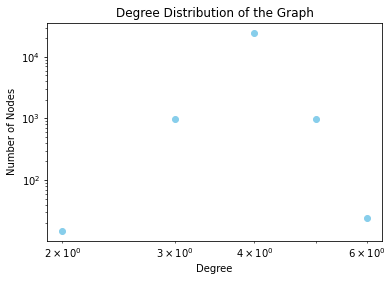

In [74]:
plot_degree_distribution(caida_ws_model_001)

In [75]:
graph = caida_ws_model_001
result = test_improved_triangle_count(graph)

Number of triangles: 25698
Calculating triangle done in 0.07321 seconds


In [76]:
graph = caida_ws_model_001
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 160
Calculating lower bound done in 21.54746 seconds


In [77]:
degree_distribution = compute_degree_distribution(caida_ws_model_01)
print(degree_distribution)

{4: 13990, 5: 5061, 3: 5399, 2: 865, 6: 941, 8: 22, 7: 115, 1: 81, 0: 1}


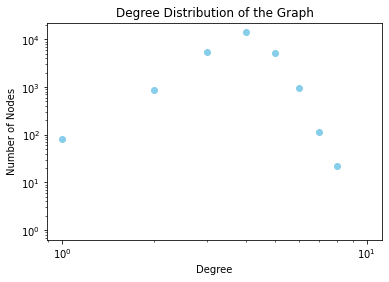

In [78]:
plot_degree_distribution(caida_ws_model_01)

In [79]:
graph = caida_ws_model_01
result = test_improved_triangle_count(graph)

Number of triangles: 19393
Calculating triangle done in 0.05189 seconds


In [80]:
graph = caida_ws_model_01
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 30
Calculating lower bound done in 28.51330 seconds


In [81]:
degree_distribution = compute_degree_distribution(caida_ws_model_03)
print(degree_distribution)

{3: 6243, 5: 5303, 4: 7599, 1: 677, 2: 2893, 7: 887, 6: 2534, 8: 230, 10: 10, 0: 50, 9: 48, 11: 1}


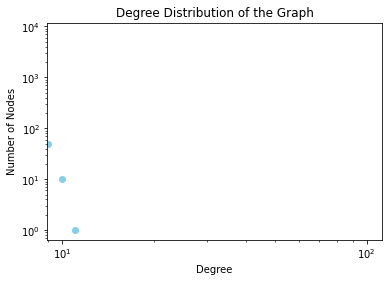

In [82]:
plot_degree_distribution(caida_ws_model_03)

In [83]:
graph = caida_ws_model_03
result = test_improved_triangle_count(graph)

Number of triangles: 9153
Calculating triangle done in 0.06824 seconds


In [84]:
graph = caida_ws_model_03
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 17
Calculating lower bound done in 35.33622 seconds


In [85]:
degree_distribution = compute_degree_distribution(inet_ws_model_001)
print(degree_distribution)

{8: 8369, 7: 660, 9: 658, 6: 26, 10: 27}


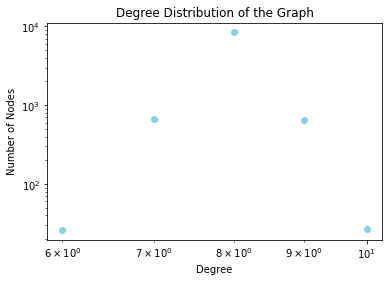

In [86]:
plot_degree_distribution(inet_ws_model_001)

In [87]:
graph = inet_ws_model_001
result = test_improved_triangle_count(graph)

Number of triangles: 56704
Calculating triangle done in 0.06756 seconds


In [88]:
graph = inet_ws_model_001
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 43
Calculating lower bound done in 11.05019 seconds


In [89]:
degree_distribution = compute_degree_distribution(inet_ws_model_01)
print(degree_distribution)

{8: 3421, 11: 218, 7: 2218, 9: 2078, 10: 770, 6: 795, 5: 174, 4: 26, 13: 11, 12: 28, 3: 1}


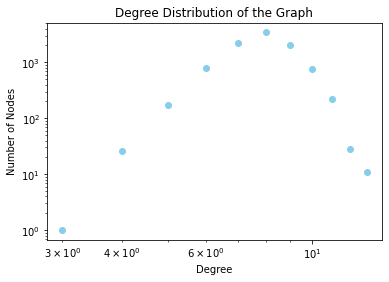

In [90]:
plot_degree_distribution(inet_ws_model_01)

In [91]:
graph = inet_ws_model_01
result = test_improved_triangle_count(graph)

Number of triangles: 42808
Calculating triangle done in 0.07867 seconds


In [92]:
graph = inet_ws_model_01
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 12
Calculating lower bound done in 12.53448 seconds


In [93]:
degree_distribution = compute_degree_distribution(inet_ws_model_03)
print(degree_distribution)

{6: 1269, 9: 1602, 7: 1795, 12: 285, 11: 621, 10: 1103, 8: 1928, 5: 650, 13: 109, 3: 62, 2: 7, 4: 258, 14: 38, 15: 11, 17: 1, 1: 1}


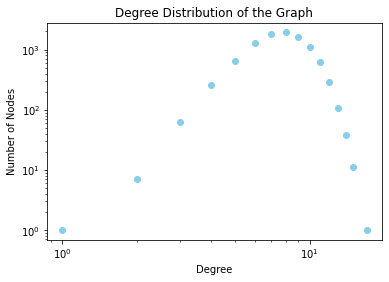

In [94]:
plot_degree_distribution(inet_ws_model_03)

In [95]:
graph = inet_ws_model_03
result = test_improved_triangle_count(graph)

Number of triangles: 19938
Calculating triangle done in 0.06435 seconds


In [96]:
graph = inet_ws_model_03
sample_size = 1500
result = test_lower_bound_diameter(graph, sample_size=sample_size)

Lower bound for diameter: 8
Calculating lower bound done in 14.05874 seconds


Answer

## Exercise 5: configuration model

### Question 9

For both graphs, create a Configuration Model of the graph with the same degree sequence as the original graph.

Unfortunately, the version "with rejection" runs too slowly to be used here, so implement the version "with loops and multi-edges deletion" seen in the course.

In [97]:
def configuration_model_with_deletion(degree_sequence):
    """
    Generate a configuration model of a graph with loops and multi-edges deletion.

    Parameters:
    - degree_sequence: List of node degrees for the desired configuration

    Returns:
    - graph: Dictionary representing the generated graph (adjacency list)
    """
    # Check if the sum of degrees is even
    if sum(degree_sequence) % 2 != 0:
        raise ValueError("Sum of degrees must be even for a valid graph")

    # Create a list of stubs (half-edges) for each node based on its degree
    stubs = [node for node, degree in enumerate(degree_sequence) for _ in range(degree)]

    # Randomly match the stubs to form edges
    random.shuffle(stubs)
    edges = set()

    # Iterate until there are at least 2 stubs
    while len(stubs) >= 2:
        u = stubs.pop()
        v = stubs.pop()

        # Avoid self-loops and multi-edges
        while u == v or (u, v) in edges or (v, u) in edges:
            if len(stubs) < 2:
                raise ValueError("Unable to create a valid graph")
            v = stubs.pop()

        edges.add((u, v))

    # Create the graph from the edges
    graph = {u: set() for u, _ in enumerate(degree_sequence)}
    for u, v in edges:
        graph[u].add(v)
        graph[v].add(u)

    return graph

In [98]:
def find_degree_sequence(graph):
    """
    Find the degree sequence of a graph.

    Parameters:
    - graph: Dictionary representing the input graph (adjacency list)

    Returns:
    - degree_sequence: List containing the degree of each node in the graph
    """
    # Calculate the degree of each node and create the degree sequence
    degree_sequence = [len(neighbors) for neighbors in graph.values()]
    return degree_sequence

In [99]:
caida_degree_sequence = find_degree_sequence(caida_graph)
print("Degree Sequence:", caida_degree_sequence)

Degree Sequence: [3, 227, 2, 913, 518, 1631, 2628, 999, 271, 176, 3, 47, 2, 47, 239, 3, 14, 42, 9, 59, 1, 1, 2, 14, 50, 3, 7, 30, 2, 4, 6, 30, 36, 11, 2, 1, 11, 2, 30, 5, 3, 49, 3, 5, 4, 3, 34, 4, 13, 8, 16, 1, 30, 2, 3, 2, 2, 2, 5, 3, 2, 7, 4, 14, 5, 2, 3, 8, 4, 4, 5, 2, 9, 11, 2, 19, 3, 2, 2, 2, 1, 9, 2, 3, 2, 5, 2, 2, 4, 2, 1, 2, 3, 2, 3, 4, 13, 2, 2, 5, 2, 1, 1, 1, 4, 3, 1, 6, 9, 3, 3, 2, 5, 2, 4, 2, 1, 6, 2, 3, 5, 3, 2, 1, 6, 3, 7, 4, 2, 8, 6, 2, 3, 2, 3, 7, 2, 2, 2, 5, 2, 3, 1, 2, 1, 2, 3, 8, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 2, 1, 2, 12, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 564, 26, 405, 497, 1699, 2052, 4, 2, 113, 290, 292, 2, 89, 2, 5, 615, 564, 498, 1677, 220, 308, 319, 177, 8, 311, 695, 20, 11, 16, 5, 2, 2, 61, 124, 40, 222, 169, 72, 233, 95, 61, 4, 135, 540, 10, 2, 156, 2, 143, 1, 327, 417, 2, 142, 487, 7, 3, 3, 5

In [100]:
degree_sequence = caida_degree_sequence
caida_configuration_model = configuration_model_with_deletion(degree_sequence)

In [101]:
inet_degree_sequence = find_degree_sequence(inet_graph)
print("Degree Sequence:", inet_degree_sequence)

Degree Sequence: [4, 4, 7, 20, 7, 1, 3, 5, 5, 5, 5, 5, 5, 3, 2, 11, 11, 3, 6, 5, 2, 4, 2, 2, 2, 3, 3, 4, 4, 1, 11, 4, 3, 3, 3, 4, 2, 1, 6, 1, 7, 3, 2, 3, 7, 7, 2, 3, 2, 1, 1, 3, 2, 3, 3, 2, 9, 8, 2, 2, 1, 2, 2, 4, 7, 7, 1, 1, 2, 2, 3, 3, 3, 3, 1, 2, 6, 9, 8, 7, 6, 8, 4, 1, 1, 1, 7, 1, 2, 1, 4, 1, 4, 2, 1, 5, 2, 4, 5, 1, 5, 4, 4, 4, 4, 1, 2, 9, 1, 5, 1, 2, 5, 1, 6, 27, 4, 6, 1, 5, 17, 3, 7, 4, 4, 3, 3, 2, 1, 4, 1, 16, 2, 14, 5, 1, 1, 1, 4, 20, 7, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 1, 10, 2, 6, 1, 2, 2, 2, 4, 1, 2, 8, 2, 4, 4, 8, 8, 9, 8, 9, 10, 10, 10, 10, 7, 6, 11, 11, 11, 12, 13, 12, 13, 11, 11, 13, 12, 14, 1, 6, 6, 2, 1, 1, 7, 6, 5, 8, 13, 7, 5, 6, 1, 2, 1, 3, 9, 8, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 15, 1, 3, 2, 7, 7, 8, 11, 9, 5, 3, 2, 5, 2, 5, 3, 5, 1, 1, 3, 4, 15, 3, 6, 3, 2, 3, 6, 2, 1, 2, 4, 1, 1, 5, 4, 3, 5, 4, 3, 1, 1, 1, 1, 1, 3, 7, 3, 6, 2, 1, 3, 3, 2, 1, 2, 2, 7, 7, 1, 6, 1, 1, 1, 5, 1, 1, 7, 7, 6, 10, 6, 6, 2, 10, 1, 1, 1,

In [102]:
degree_sequence = inet_degree_sequence
inet_configuration_model = configuration_model_with_deletion(degree_sequence)

### Question 10

For both CAIDA and INET graphs:

* Compare the initial degree distribution to the configuration model degree distribution. To do so, compute the fraction of nodes which degree in the model is different from their degree in the original distribution: $ \frac{n_{mod}}{n} $.

* Compare the number of triangles of the configuration model to the one of the original graph. In which case does it correspond to the result of the course? In the other case, can you propose an explanation?

In [103]:
def compare_degree_distributions(original_degree_sequence, model_degree_sequence):
    """
    Compare the degree distributions of an original graph and a model.

    Parameters:
    - original_degree_sequence: List containing the degree of each node in the original graph
    - model_degree_sequence: List containing the degree of each node in the generated model graph

    Returns:
    - fraction_different: Fraction of nodes with different degrees between the original and model graphs
    """
    # Calculate the number of nodes with different degrees
    n_total = len(original_degree_sequence)
    n_diff = sum(1 for orig, model in zip(original_degree_sequence, model_degree_sequence) if orig != model)
    
    # Calculate the fraction of nodes with different degrees
    fraction_different = n_diff / n_total
    return fraction_different

If fraction_different is close to 0, it means that the configuration model has preserved the degree distribution of the original graph well, and the two distributions are similar.

If fraction_different is close to 1, it indicates a significant difference between the original degree distribution and the configuration model. This could happen if the model deviates substantially from the original distribution.

For example, if fraction_different is 0.2, it means that 20% of the nodes in your configuration model have degrees different from their degrees in the original graph.

In [104]:
original_degree_sequence = caida_degree_sequence
model_degree_sequence = [len(neighbors) for neighbors in caida_configuration_model.values()]

fraction_different = compare_degree_distributions(original_degree_sequence, model_degree_sequence)

print("Fraction of nodes with different degrees:", fraction_different)

Fraction of nodes with different degrees: 0.019414542020774316


If the number of triangles is similar:  
If the number of triangles in the configuration model is close to the number in the original graph, it indicates that the configuration model has preserved the triangle structure well.  
If the number of triangles is significantly different:  
If the number of triangles in the configuration model is substantially different from the original graph, it suggests that the configuration model may not accurately capture the triangle relationships present in the original graph.  
Comparison:  
If the number of triangles in the configuration model is higher, it might imply that the model has introduced more triangles than what was present in the original graph.
If the number of triangles in the configuration model is lower, it might indicate a loss of triangle relationships during the configuration model generation.  
In summary, a close match in the number of triangles suggests a good preservation of the triangle structure, while a significant difference may indicate limitations or alterations introduced by the configuration model. Keep in mind that comparing specific structural properties can provide a nuanced understanding of how well the model captures the characteristics of the original graph.

In [105]:
graph = caida_graph
result = test_improved_triangle_count(graph)

Number of triangles: 36365
Calculating triangle done in 1.13431 seconds


In [106]:
graph = caida_configuration_model
result = test_improved_triangle_count(graph)

Number of triangles: 50939
Calculating triangle done in 0.45819 seconds


answer


In [107]:
original_degree_sequence = inet_degree_sequence
model_degree_sequence = [len(neighbors) for neighbors in inet_configuration_model.values()]

fraction_different = compare_degree_distributions(original_degree_sequence, model_degree_sequence)

print("Fraction of nodes with different degrees:", fraction_different)

Fraction of nodes with different degrees: 0.00995893223819302


In [108]:
graph = inet_graph
result = test_improved_triangle_count(graph)

Number of triangles: 206909
Calculating triangle done in 0.17853 seconds


In [109]:
graph = inet_configuration_model
result = test_improved_triangle_count(graph)

Number of triangles: 1327
Calculating triangle done in 0.06848 seconds


answer